#!/usr/bin/env python3
"""
Created on Thu September 8 13:46:40 2022

@author: lucas
"""

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_log_error
from keras.layers import SimpleRNN
import statistics
from tensorflow.keras.optimizers import Adam

In [29]:
#data=pd.read_csv(r"C:\Users\ljste\OneDrive - The Hill School\Coding Projects (python)\data sets\owid-covid-data.csv")

In [30]:
data=pd.read_csv(r"/Users/lucas/Library/CloudStorage/OneDrive-VillanovaUniversity/Coding Projects (Python)/data sets/owid-covid-data.csv")

In [31]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [32]:
#data=pd.read_csv(r"C:\Users\lucas\OneDrive - The Hill School\Coding Projects (python)\data sets\owid-covid-data.csv")
#data.head()

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348540 entries, 0 to 348539
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    348540 non-null  object 
 1   continent                                   331969 non-null  object 
 2   location                                    348540 non-null  object 
 3   date                                        348540 non-null  object 
 4   total_cases                                 310624 non-null  float64
 5   new_cases                                   339010 non-null  float64
 6   new_cases_smoothed                          337751 non-null  float64
 7   total_deaths                                289073 non-null  float64
 8   new_deaths                                  339052 non-null  float64
 9   new_deaths_smoothed                         337822 non-null  float64
 

In [34]:
data.location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [35]:
data[data['location']=='United States']

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
328027,USA,North America,United States,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
328028,USA,North America,United States,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
328029,USA,North America,United States,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,-2640.0,-4.2,-4.2,-7.858499
328030,USA,North America,United States,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
328031,USA,North America,United States,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329401,USA,North America,United States,2023-10-08,103436829.0,NaN,NaN,1127152.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
329402,USA,North America,United States,2023-10-09,103436829.0,NaN,NaN,1127152.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
329403,USA,North America,United States,2023-10-10,103436829.0,NaN,NaN,1127152.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN
329404,USA,North America,United States,2023-10-11,103436829.0,NaN,NaN,1127152.0,NaN,NaN,...,24.6,NaN,2.77,78.86,0.926,338289856.0,NaN,NaN,NaN,NaN


/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1147996096.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = data2.groupby('date').sum()


Text(0, 0.5, 'New cases')

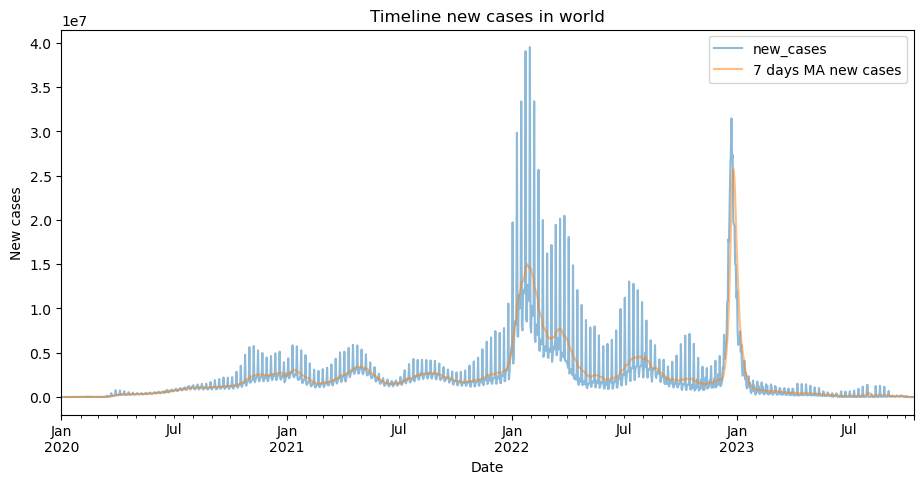

In [36]:
data2 = data.copy()
data2.date = pd.to_datetime(data2['date'])
data2 = data2.groupby('date').sum()
data2['7 days MA new cases'] = 0
data2['7 days MA new cases'] = data2['new_cases'].rolling(7).mean() #Moving average of new cases with window=10
data2['7 days MA new deaths'] = 0
data2['7 days MA new deaths'] = data2['new_deaths'].rolling(7).mean()  #Moving average of new deaths with window=10

data2[['new_cases', '7 days MA new cases']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new cases in world')
plt.xlabel('Date')
plt.ylabel('New cases')

Text(0, 0.5, 'New deaths')

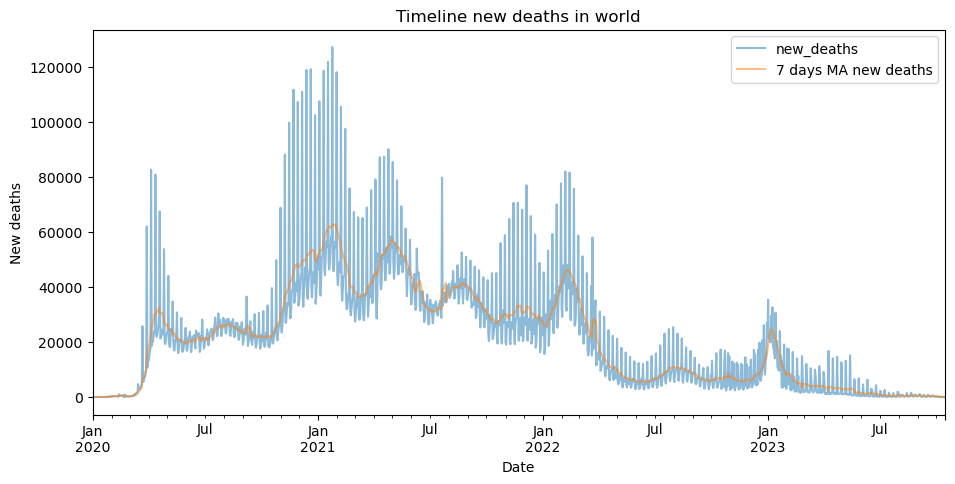

In [37]:
data2[['new_deaths', '7 days MA new deaths']].plot(figsize = (11, 5), alpha = 0.5)
plt.title('Timeline new deaths in world')
plt.xlabel('Date')
plt.ylabel('New deaths')

In [38]:
def create_and_plot_df(df, country):
    df=df[df['location']==country].copy()
    df=df[['date','total_cases','new_cases',
         'total_deaths','new_deaths',
         'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
         'new_deaths_per_million', 'new_cases_per_million']].copy()
    df.date = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    df['7 days MA new cases'] = 0
    df['7 days MA new cases'] = df['new_cases'].rolling(7).mean()
    df['7 days MA new deaths'] = 0
    df['7 days MA new deaths'] = df['new_deaths'].rolling(7).mean()
    df['7 days MA new cases per million'] = 0
    df['7 days MA new cases per million'] = df['new_cases_per_million'].rolling(7).mean()
    df['7 days MA new deaths per million'] = 0
    df['7 days MA new deaths per million'] = df['new_deaths_per_million'].rolling(7).mean()
    df[['new_cases', '7 days MA new cases']].plot(figsize = (15, 5), alpha = 0.5)
    plt.title(f'Timeline new cases in {country}')
    df[['new_deaths', '7 days MA new deaths']].plot(figsize = (15, 5), alpha = 0.5)
    plt.title(f'Timeline new deaths in {country}')
    df[['people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred']].plot(figsize = (15, 5), alpha = 0.5)
    plt.ylim([0,100])
    plt.fill_between(df.index, df.people_vaccinated_per_hundred)
    plt.fill_between(df.index, df.people_fully_vaccinated_per_hundred)
    plt.title(f'Timeline percentage of people vaccinated in {country}')
    return df

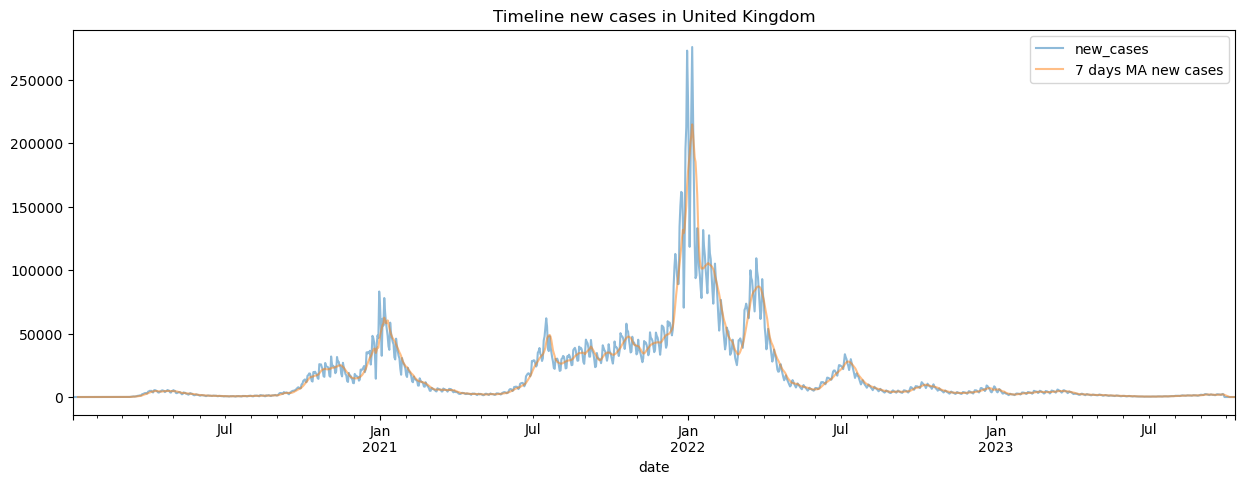

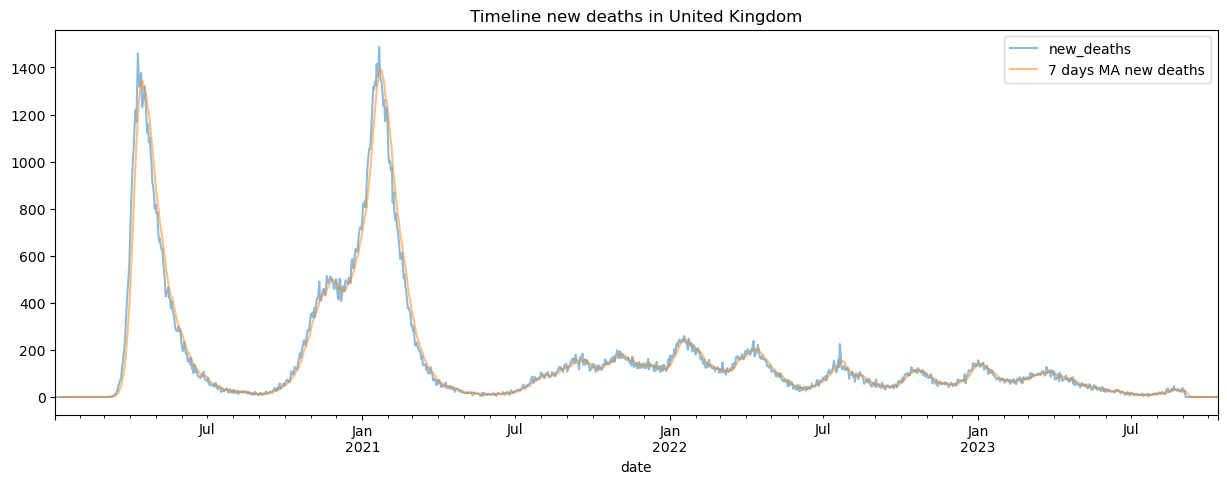

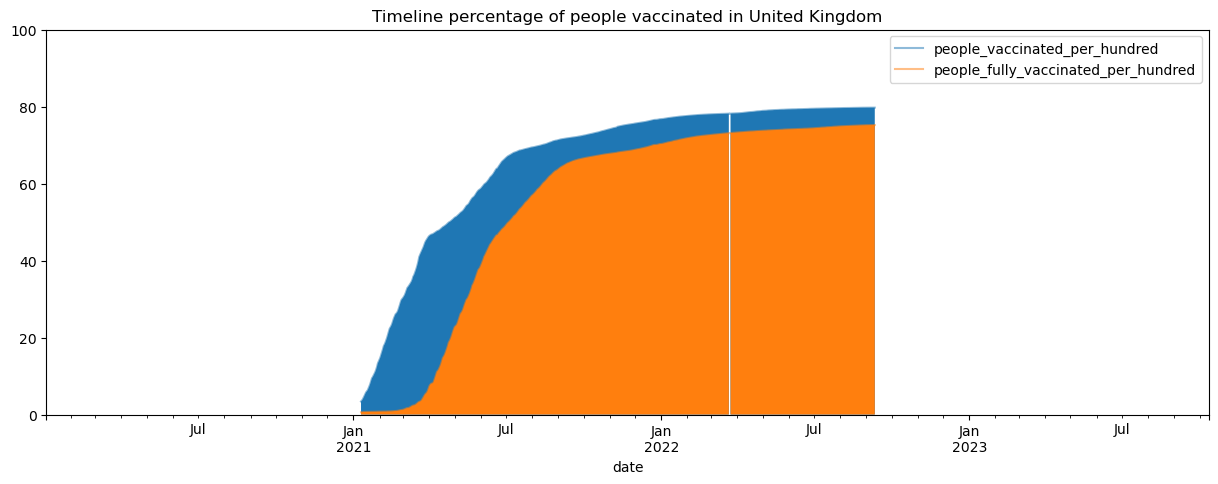

In [39]:
df_uk=create_and_plot_df(data, 'United Kingdom')

In [40]:
#df_uk

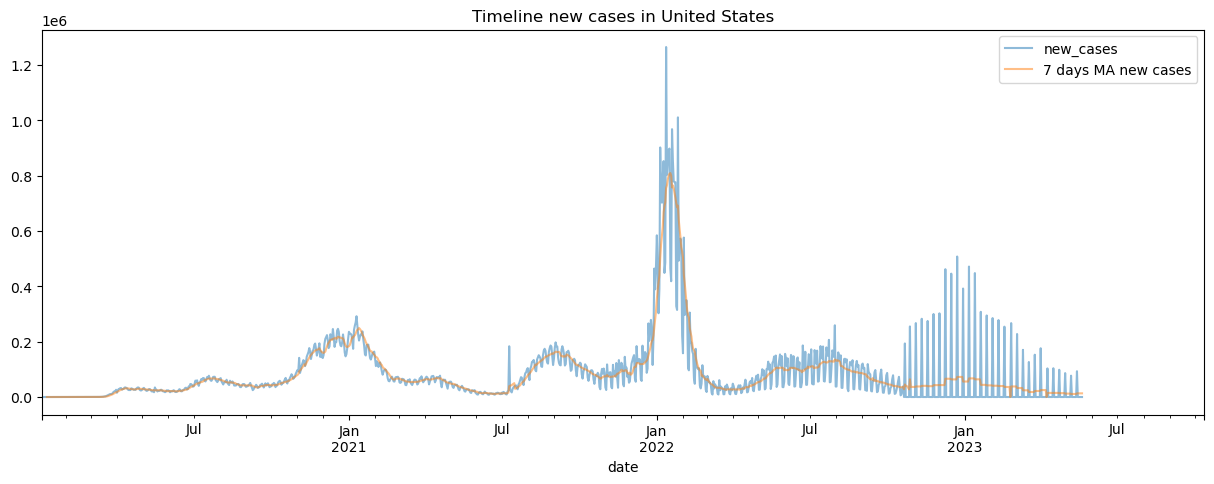

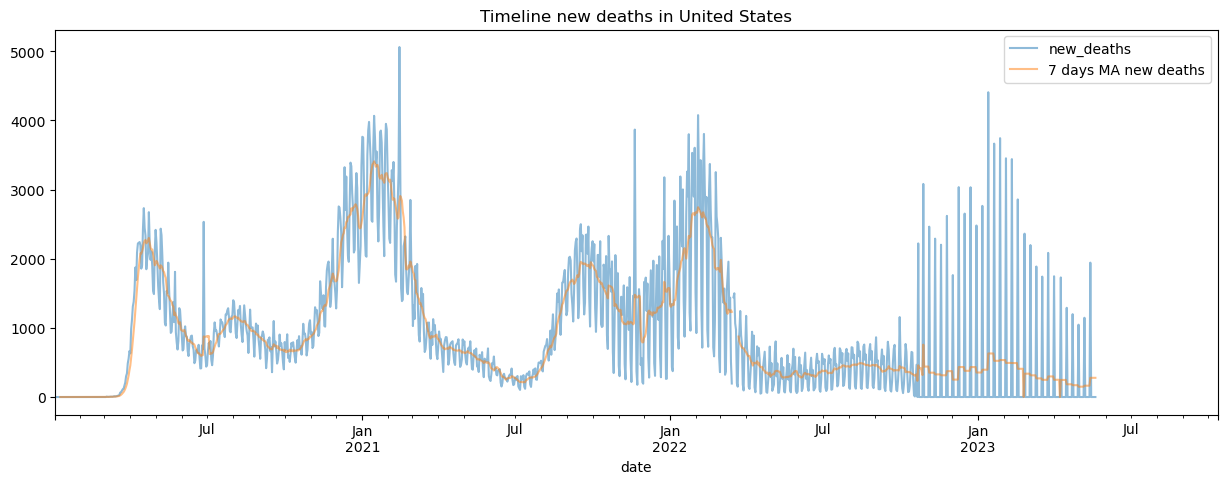

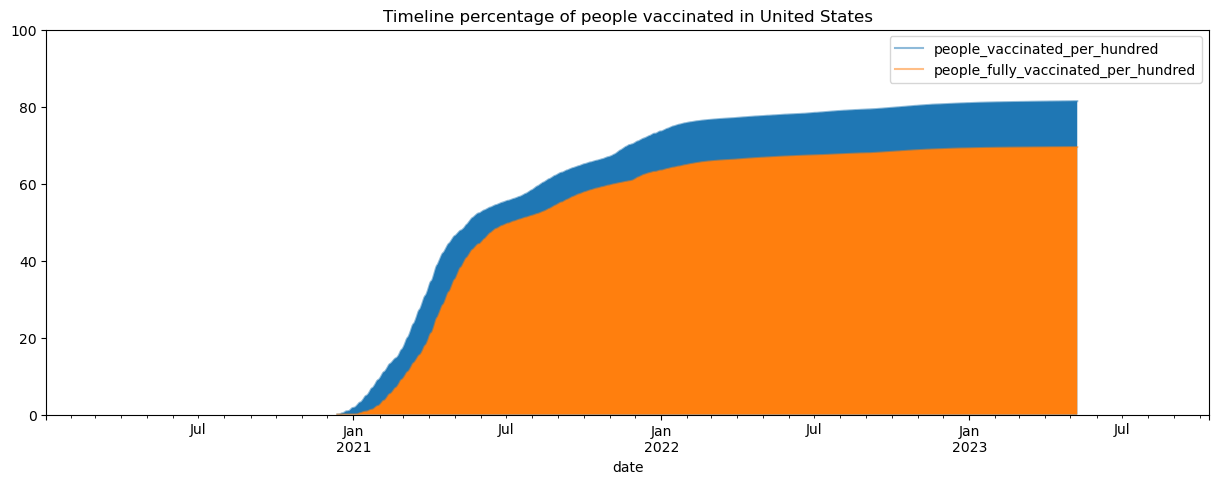

In [41]:
df_us=create_and_plot_df(data, 'United States')

In [42]:
#df_us

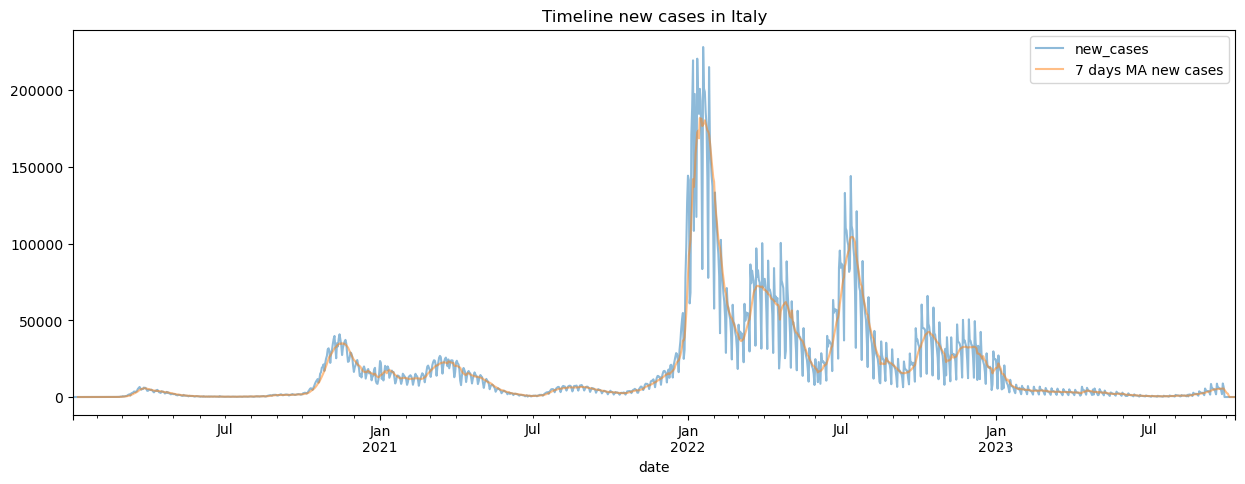

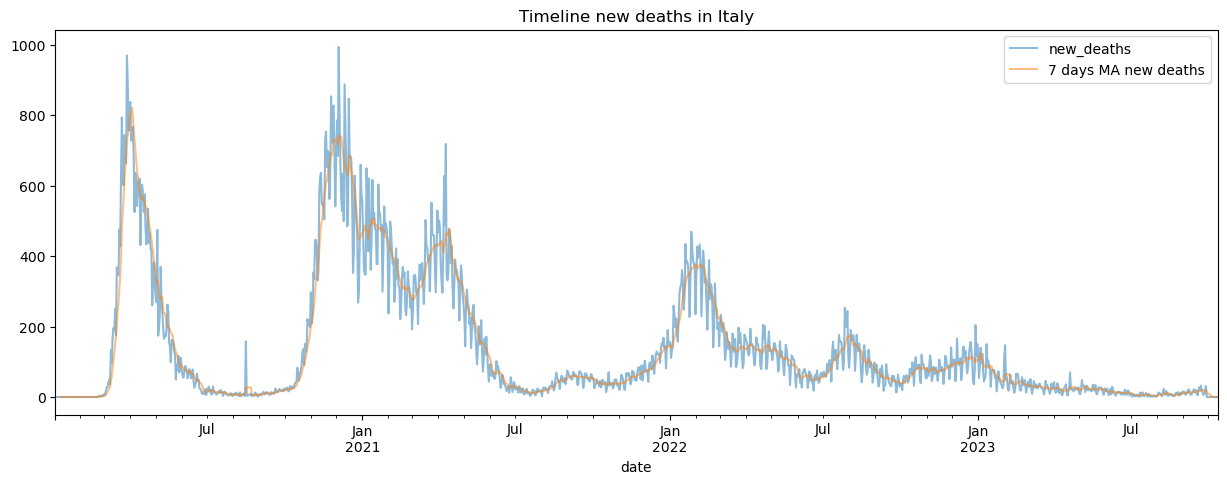

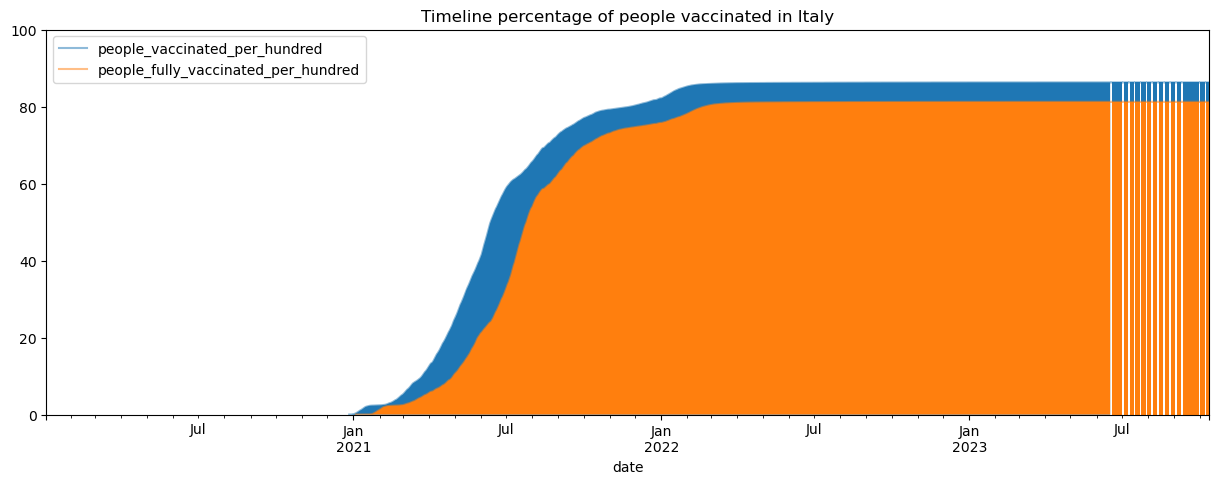

In [43]:
df_italy=create_and_plot_df(data, 'Italy')

In [44]:
df_italy

,total_cases,new_cases,total_deaths,new_deaths,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_deaths_per_million,new_cases_per_million,7 days MA new cases,7 days MA new deaths,7 days MA new cases per million,7 days MA new deaths per million
date,,,,,,,,,,,,
2020-01-03,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-04,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-05,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-06,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2020-01-07,NaN,0.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-08,26082645.0,0.0,191715.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-09,26082645.0,0.0,191715.0,0.0,86.27,81.22,0.0,0.0,0.0,0.0,0.0,0.0
2023-10-10,26082645.0,0.0,191715.0,0.0,86.27,81.22,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df3_countries=pd.DataFrame()
df3_countries['New cases per million uk'] = df_uk['7 days MA new cases per million']
df3_countries['New cases per million us'] = df_us['7 days MA new cases per million']
df3_countries['New cases per million italy'] = df_italy['7 days MA new cases per million']
df3_countries['New deaths per million uk'] = df_uk['7 days MA new deaths per million']
df3_countries['New deaths per million us'] = df_us['7 days MA new deaths per million']
df3_countries['New deaths per million italy'] = df_italy['7 days MA new deaths per million']
df3_countries['date'] = df_uk.index
df3_countries.set_index('date', inplace=True)

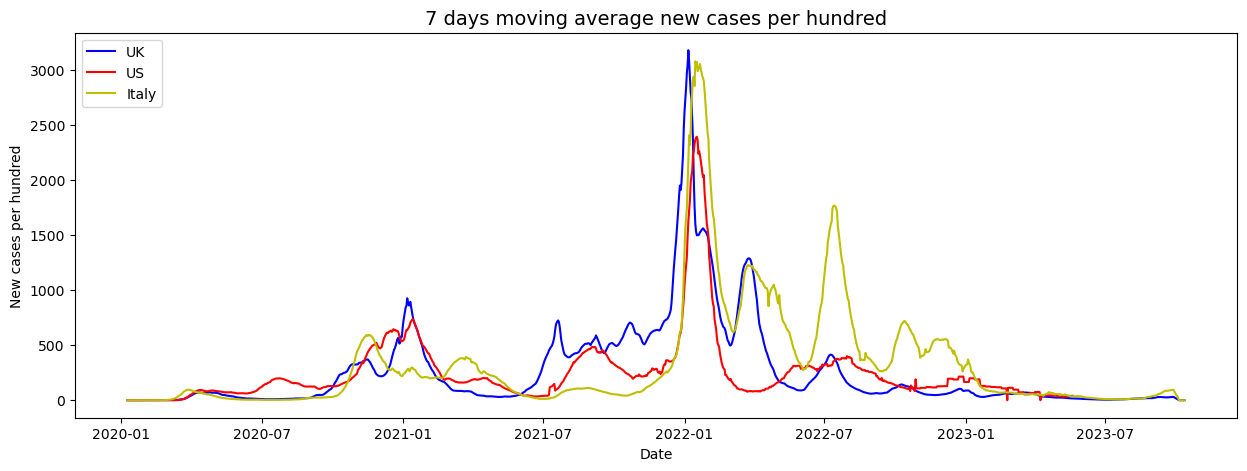

In [46]:
plt.figure(figsize=(15, 5))
plt.plot(df3_countries.index, df3_countries['New cases per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New cases per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New cases per million italy'], "-y", label="Italy")
plt.legend(loc="upper left")
plt.title("7 days moving average new cases per hundred",fontsize=14)
plt.ylabel('New cases per hundred')
plt.xlabel('Date')
plt.show()

In [47]:
print('AUC New cases per million in the UK: ', df3_countries['New cases per million uk'].sum())
print('AUC New cases per million in the US: ', df3_countries['New cases per million us'].sum())
print('AUC New cases per million in Italy: ', df3_countries['New cases per million italy'].sum())

AUC New cases per million in the UK:  366526.11199999996
AUC New cases per million in the US:  305763.906
AUC New cases per million in Italy:  441798.12899999996


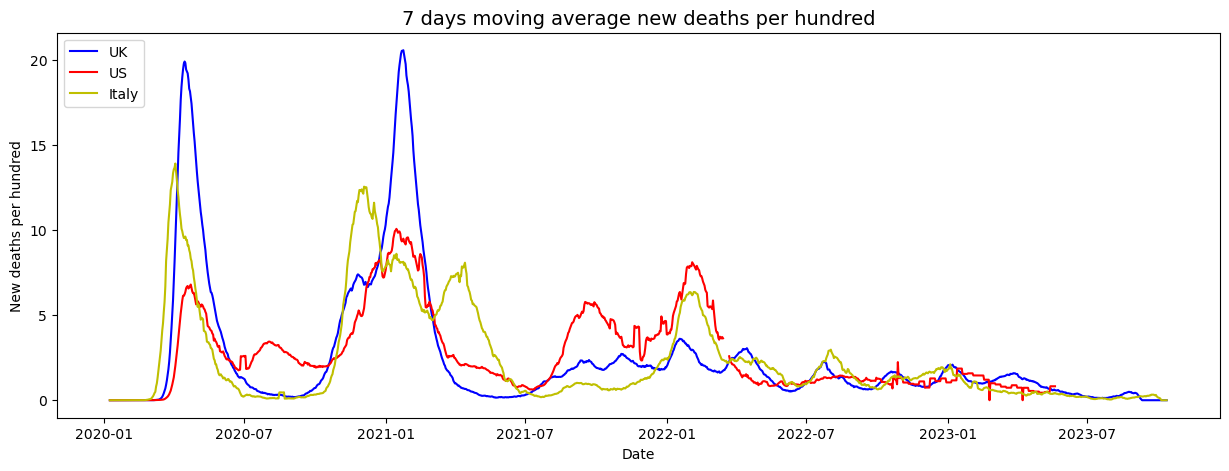

In [48]:
plt.figure(figsize=(15, 5))
plt.plot(df3_countries.index, df3_countries['New deaths per million uk'], "-b", label="UK")
plt.plot(df3_countries.index, df3_countries['New deaths per million us'], "-r", label="US")
plt.plot(df3_countries.index, df3_countries['New deaths per million italy'], "-y", label="Italy")
plt.legend(loc="upper left")
plt.title("7 days moving average new deaths per hundred",fontsize=14)
plt.ylabel('New deaths per hundred')
plt.xlabel('Date')
plt.show()

In [49]:
print('AUC New deaths per million in the UK: ', df3_countries['New deaths per million uk'].sum())
print('AUC New deaths per million in the US: ', df3_countries['New deaths per million us'].sum())
print('AUC New deaths per million in Italy: ', df3_countries['New deaths per million italy'].sum())

AUC New deaths per million in the UK:  3403.486
AUC New deaths per million in the US:  3321.068142857143
AUC New deaths per million in Italy:  3247.3689999999997


In [50]:
def build_model(country_data, name_country):
  new_df=country_data['7 days MA new cases']

  if name_country == 'USA':
    new_df=new_df[7:].copy()
  else:
    new_df=new_df[6:].copy()  
  window=10
  train_len = math.ceil(len(new_df)*0.8)
  train_data = new_df[0:train_len]
  X_train=[]
  Y_train=[]

  for i in range(window, len(train_data)):
      X_train.append(train_data[i-window:i])
      Y_train.append(train_data[i])  
  X_train, Y_train= np.array(X_train), np.array(Y_train)
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  test_data = new_df[train_len-window:]
  X_val=[]
  Y_val=[]

  for i in range(window, len(test_data)):
      X_val.append(test_data[i-window:i])
      Y_val.append(test_data[i])
  X_val, Y_val = np.array(X_val), np.array(Y_val)
  X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1],1))
  r1=[]
  r2=[]
  model=Sequential()
  model.add(SimpleRNN(50,return_sequences=True, activation='relu', input_shape=(X_train.shape[1],1)))
  model.add(SimpleRNN(50,return_sequences=False,activation='relu'))
  model.add(Dense(100))
  model.add(Dense(25))
  model.add(Dense(1))
  opt1=Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
  model.compile(loss='mean_squared_error', optimizer=opt1)
  model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=0)
  lstm_train_pred = model.predict(X_train)
  lstm_valid_pred = model.predict(X_val)
  lstm_train_pred[lstm_train_pred<0] = 0
  lstm_valid_pred[lstm_valid_pred<0] = 0   
  valid = pd.DataFrame(new_df[train_len:])
  valid['Predictions'] = model.predict(X_val)
  plt.figure(figsize=(16,8))
  plt.title(f'Validation and predicted values by RNN model in {name_country}')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.plot(valid[['7 days MA new cases','Predictions']])
  plt.legend(['Validation','Predictions'])
  plt.show()
  return new_df.copy(), model, valid

In [51]:
def future_values(model, future_df, days, name_country):
  for i in range(1,days+1,1):
    last_10_days=future_df[-10:].values
    X_test=[]
    X_test.append(last_10_days)
    X_test=np.array(X_test)
    X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
    pred_new_cases=model.predict(X_test)
    idx = pd.date_range(future_df.index[-1], periods=1, freq='D')[1:]
    future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
  
  plt.figure(figsize=(16,8))
  plt.title(f'Historic values and forecasting of future values in {name_country}')
  plt.xlabel('Date')
  plt.ylabel('New cases')
  plt.plot(future_df[:-days])
  plt.plot(future_df[-days:])
  plt.legend(['Historic values','Forecast'])
  plt.show()

  return future_df

9/9 [==============================] - 0s 874us/step


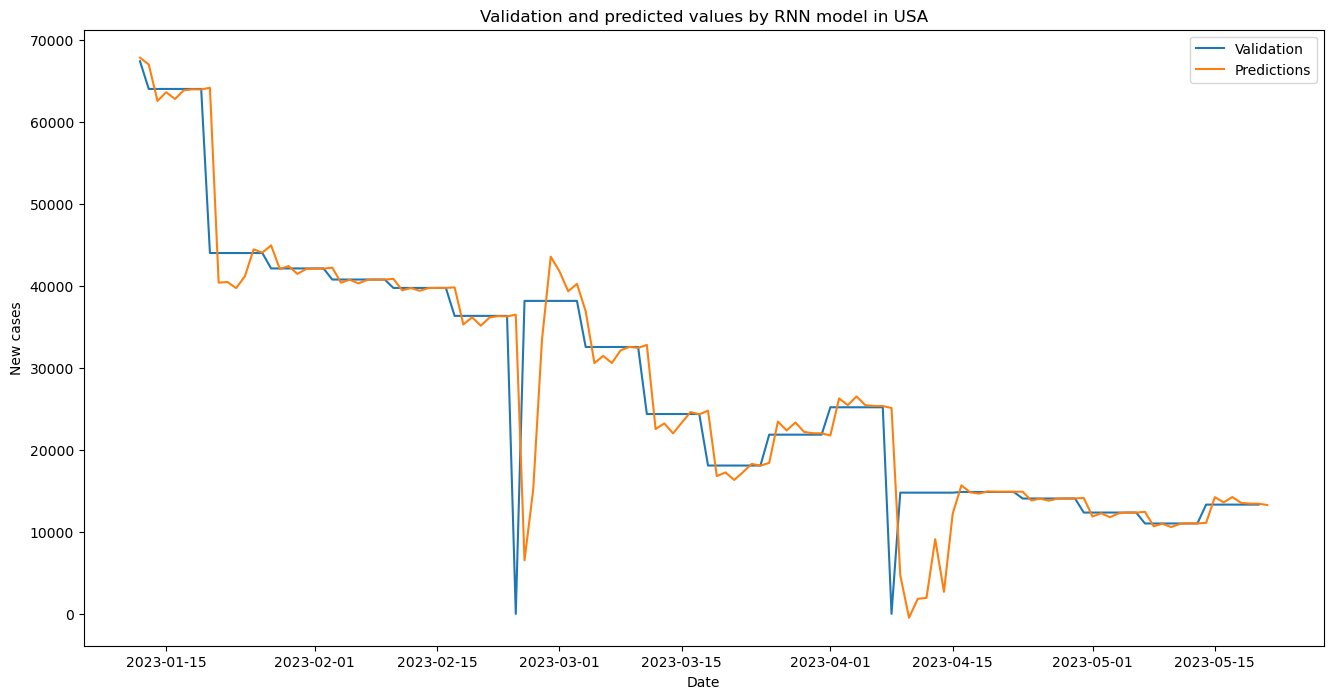

In [52]:
df_us_cut, model_us, valid_df_us = build_model(df_us, 'USA')

1/1 [==============================] - 0s 8ms/step


/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.

1/1 [==============================] - 0s 8ms/step


/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.

1/1 [==============================] - 0s 8ms/step


/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  future_df=future_df.append(pd.Series(pred_new_cases[0][0], index=idx)).copy()
/var/folders/rl/3_cb7s0n3b9_tst2t_6rg_t80000gn/T/ipykernel_11018/1579577048.py:10: FutureWarning: The series.

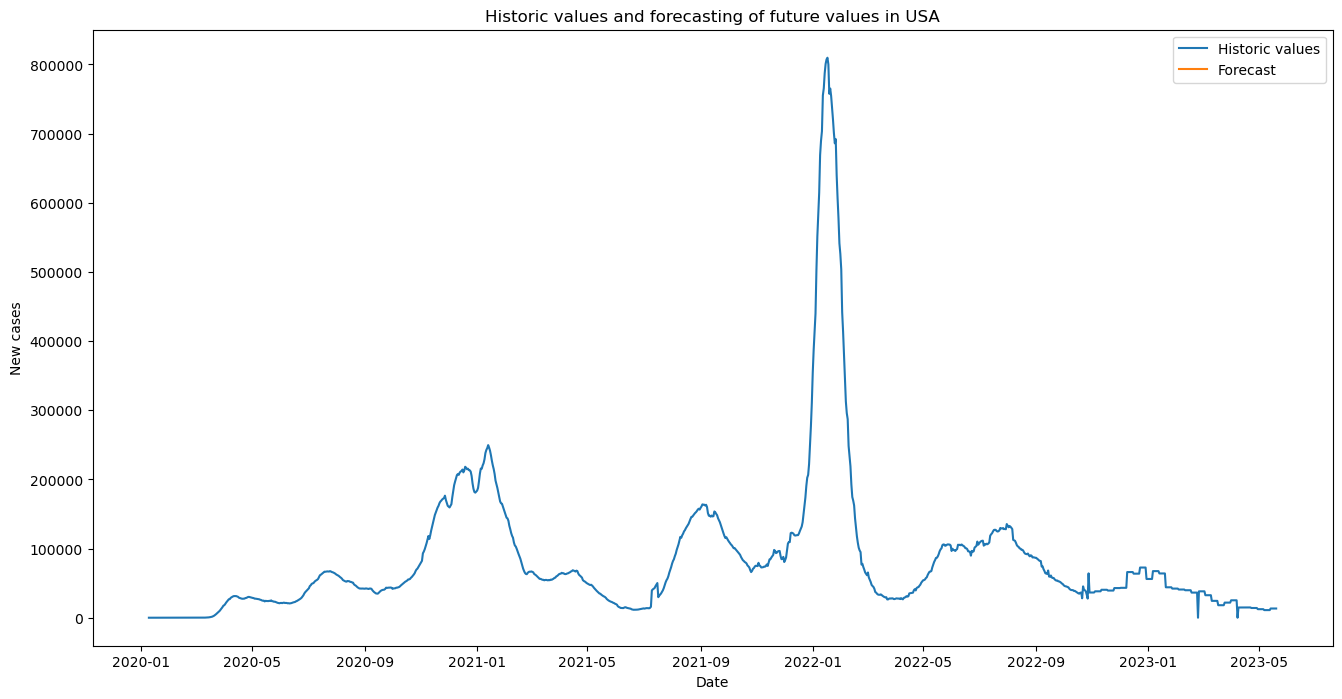

In [53]:
forecasting_us = future_values(model_us, df_us_cut, 30, 'USA')